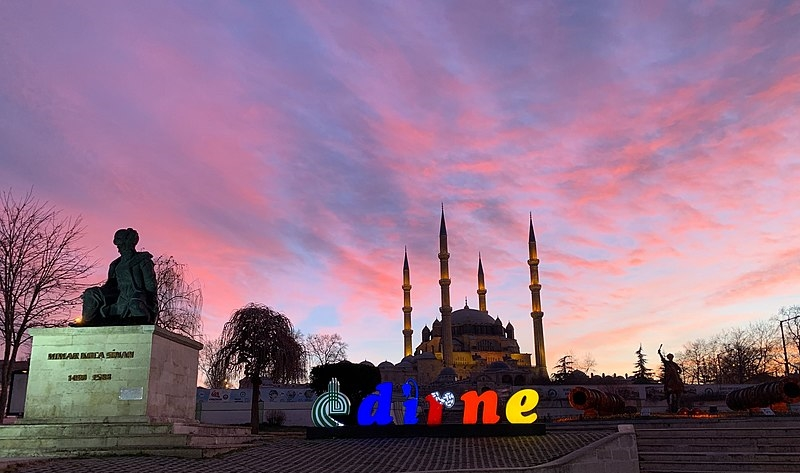

# TRAKYA ÜNİVERSİTESİ BİLGİSAYAR MÜHENDİSLİĞİ
#  BÖLÜM, ÖĞRENCİ VE MEZUN VERİLERİ ANALİZİ
# -
# (TRAKYA UNIVERSITY COMPUTER ENGINEERING
# DEPARTMENT, STUDENT AND ALUMNI DATA ANALYSIS)
    
* **Bu Raporda Trakya Üniversitesi Bilgisayar Mühendisliği bölümü için toplanan çeşitli veriler analiz edilip,**
    * **bölümü tercih etmeyi düşünen kişilere,**
    * **bölümün halihazırdaki öğrencilerine,**
    * **bölümden mezun olup ya da bölümle ilgili araştırmaları merak edenlere,**
    * **hitap edip rehberlik etmesine yönelik hazırlanmıştır.**
    # -
* **In this Report, various data collected for Trakya University Computer Engineering Department are analyzed and**
    * **For those who want to choose the department,**
    * **current students of the department,**
    * **For those who graduated from the department or are curious about the researches related to the department,**
    * **It has been prepared to address and guide.**


Konu Başlıkları Halinde Kullanılan Veri Setleri ve Alt Başlıklar(TOPICS):

1. [**DEMOGRAFİ(DEMOGRAPHY)**](#1)
    * Fakültedeki öğrenciler arasında bilgisayar mühendisliği öğrencisi oranı nedir?
    * Şehirdeki üniversite öğrencileri arasında bilgisayar mühendisliği öğrencisi oranı nedir? 
    * Bölümün kız erkek oranı nasıl? 
    * Bölüme gelen öğrenciler genellikle hangi şehirlerden geliyor?
    * Bölüme gelen öğrenciler genellikle hangi coğrafi bölgelerden geliyor?
1. [**DERSLER(LECTURES)**](#2)
    * Hangi akademisyenler derslerden kolay kolay geçirmiyor?
    * Derslerin katsayıları(AKTS) ile başarısız öğrenci sayısı arasında bir bağlantı var mı?
    * Öğrenciler en çok hangi derslerden kolay kolay geçemiyor, takılıyor?
    * Sınıf, yıl ve derslerden başarısız olma sayıları arasında doğru/ters orantı(korelasyon) var mı?
    * Güz ve bahar yıllarında derslerden kalan öğrenci sayısı kıyaslaması yapılabilir mi?
1. [**NOT ORTALAMASI BAŞARILARI(%10)(STUDENT SUCCESS)**](#3)
    * Öğrencinin bölüme giriş sırasının(numarasının son 2 hanesi) yüksek ortalama yapmasıyla bir bağlantısı var mı?
    * sınıfın ilk %10'luk başarı diliminde kızlar mı erkekler mi daha çok yer alıyor?
    * sınıfın ilk %10'luk başarı dilimine güz döneminde ve bahar döneminde cinsiyete göre dağılımda değişiklik oluyor mu?
    * Bölümün en başarılı öğrencileri kimler?
    * Bölümde şimdiye kadar en yüksek yapılan ortalamaları görebilir miyiz?
    * %10'luk başarı listesinde en sık rastlanan isim çeşitleri neler?
1. [**AKADEMİSYENLER(ACADEMICIANS)**](#4)
    * Bölümün akademisyenlerinin yayınladığı yayın ve makaleler vb. konular açısından kıyaslamalarını öğrenebilir miyiz?
    * Yaptığımız akademisyen kıyaslamalarının değişkenleri arasındaki korelasyonu görebilir miyiz?
1. [**BÖLÜMÜN PUANI(DEPARTMENT SCORE)**](#5)
    * Bölümün Türkiye'de devlet üniversitelerindeki bilgisayar mühendislikleri arasındaki yeri neresidir?
    * Bölümün kendi üniversitesindeki sayısal bölümler arasındaki yeri neresidir?
1. [**300 ADET BÖLÜM ETİKETİNE SAHİP İŞ BULMA SİTESİNDEN KİŞİ(300 GRADUATE PEOPLE FROM THE DEPARTMENT)**](#6)
    * Profillerine bu bölümü eklemiş kişilerin açıklamalarında en sık rastlanan kelimeler neler?
    * bu bölümden mezun olmuş kişiler en çok hangi kurumlarda çalışıyor?
    * Bu bölümden mezun olmuş kişiler en sık hangi konumlarda çalışıyor?
1. [**SON(CONCLUSION)**](#7)
    * Veri Kaynakları
    * Hazırlayan
    


## KUTUPHANELER(LIBRARIES)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno

#seaborn büyütmeyle ilgili
sns.reset_orig()


<a id="1"></a> <br>
# DEMOGRAFI(DEMOGRAPHY)

In [ ]:
df_cins=pd.read_csv('../input/computer-science-department-and-alumni-datasets/genders.csv')
df_cins2=df_cins
df_cins2['Toplam']=df_cins2['2020']+df_cins2['2019']+df_cins2['2018']+df_cins2['2017']+df_cins2['2016']
df_cins2=df_cins2.sort_values(by=['Toplam'],ascending=False)
df_cins2=df_cins.set_index('Unnamed: 0')
df_cins2[:]

In [ ]:
j,k=df_cins2.iloc[8,5],df_cins2.iloc[4,5]
j=j-k
a,b=(k*100)/(j+k),(j*100)/(j+k)
a=int(a)
b=int(b)

fig, ax = plt.subplots()
labels = ['DİĞER ÖĞRENCİLER', 
         ' BİLGİSAYAR MÜHENDİSLİĞİ ÖĞRENCİLERİ']
percentages = [b,a]
explode=(0.2,0)
ax.pie(percentages, explode=explode, labels=labels
       , autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("T.Ü. MÜH.FAKÜLTESİNDE SON 5 YILDAKİ ÖĞRENCİ ORANI (2020-)",fontsize=20)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

In [ ]:
j,k=df_cins2.iloc[9,5],df_cins2.iloc[4,5]
j=j-k
a,b=(k*100)/(j+k),(j*100)/(j+k)
a=int(a)
b=int(b)

fig, ax = plt.subplots()
labels = ['İLÇEDE BULUNAN DİĞER ÖĞRENCİLER', 
         ' BİLGİSAYAR MÜHENDİSLİĞİ ÖĞRENCİLERİ']
percentages = [b,a]
explode=(0.2,0)
ax.pie(percentages, explode=explode, labels=labels
       , autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("EDİRNE MERKEZ İLÇESİNDE SON 5 YILDAKİ ÖĞRENCİLER (2020-)",fontsize=20)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

#EDİRNE MERKEZ İLÇESİNDE 100 ÖĞRENCİDEN 1'İ BİLGİSAYAR MÜHENDİSİ

In [ ]:
j,k=df_cins2.iloc[3,5],df_cins2.iloc[2,5]
j=j-k
a,b=(k*100)/(j+k),(j*100)/(j+k)
a=int(a)
b=int(b)

fig, ax = plt.subplots()
#plt.rcParams['font.size']=15
labels = ['ERKEK', 
         ' KIZ']
percentages = [b,a]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels
       , autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.32)
ax.axis('equal')
ax.set_title("T.Ü. SON 5 YILDAKİ BİLGİSAYAR MÜHENDİSLİĞİ ÖĞRENCİLERİ CİNSİYET ORANI (2020-)",fontsize=15)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

### OGRENCILERIN GELDIGI SEHIRLER(CITIES THAT STUDENTS COME FROM)

In [ ]:
df_il_orj=pd.read_csv('../input/computer-science-department-and-alumni-datasets/cities.csv',encoding='ISO-8859-9')
df_il=df_il_orj.copy()
df_il_orj.head()

In [ ]:
df_il['toplam']=df_il['2020']+df_il['2019']+df_il['2018']+df_il['2017']+df_il['2016']
df_il=df_il.sort_values(by=['toplam'],ascending=False)
df_il=df_il.reset_index()
del df_il['index']
df_il=df_il.set_index('Unnamed: 0')
df_il=df_il.drop(['yıllık toplam'])
df_il=df_il['toplam']
df_il=pd.DataFrame(df_il)
df_il=df_il.reset_index()
df_il.columns=[0,1]
df_il.rename(columns = {0 : "Sehir", 1 : "ogrenci sayisi"}, inplace = True)

In [ ]:
fig = px.pie(df_il, values='ogrenci sayisi', names='Sehir', title='SON 5 YILDA T.Ü. BİLGİSAYAR MÜHENDİSLİĞİ OGRENCILERININ SEHIR ORANI (2020-)')
fig.show()

In [ ]:
df_cog=pd.read_csv('../input/computer-science-department-and-alumni-datasets/geographic_area.csv',encoding='ISO-8859-9')
df_cog['toplam']=df_cog['2020']+df_cog['2019']+df_cog['2018']+df_cog['2017']+df_cog['2016']
df_cog.drop(['2020','2019','2018','2017','2016'], inplace=True, axis=1)
df_cog

In [ ]:
fig = {
  "data": [
    {
      "values": df_cog['toplam'],
      "labels": df_cog['Unnamed: 0'],
      "domain": {"x": [0.5, .5]},
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"SON 5 YILDA(2020-) BILGISAYAR MUHENDISLERI COGRAFI BOLGE ORANI",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="2"></a> <br>
# DERSLER(LECTURES)

In [ ]:
df_kalan=pd.read_csv('../input/computer-science-department-and-alumni-datasets/computer_science_lectures.csv')
df_kalan['Toplam_Alınan']=df_kalan['2020']+df_kalan['2019']+df_kalan['2018']+df_kalan['2017']
df_kalan[:10]

In [ ]:
df_kalan_sirali3=df_kalan.copy()
df_kalan_sirali3=df_kalan.groupby(['akademisyen']).sum()
df_kalan_sirali3=df_kalan_sirali3.sort_values(by=['Toplam_Alınan'],ascending=False)
df_kalan_sirali3=df_kalan_sirali3.reset_index()
df_kalan_sirali3.drop(['akts', 'sınıf','zorunlu'], axis=1,inplace=True)

In [ ]:
sns.set_context('paper')
f, ax = plt.subplots(figsize = (17,10))
sns.set_color_codes('pastel')
sns.barplot(x = 'Toplam_Alınan', y = 'akademisyen', data = df_kalan_sirali3,
            label = 'Son 4 Yıl Toplamı', color = 'b', edgecolor = 'w').set_title('AKADEMISYENLERIN TEKRAR VEYA ILK KEZ DERS VERDIGI OGRENCI SAYISI TOPLAMLARI')
sns.set_color_codes('muted')
sns.barplot(x = '2020', y = 'akademisyen', data = df_kalan_sirali3,
            label = '2020 Yılı', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right',prop={'size': 15})
sns.despine(left = True, bottom = True)
plt.show()

In [ ]:
df_kalan3=df_kalan.copy()
df_kalan3.rename(columns={'Toplam_Alınan': 'Toplam Ders Alan Sayısı'}, inplace=True)

df_kalan3.dropna(inplace=True)
df_kalan3['sınıf']=df_kalan3['sınıf'].astype(int)
df_kalan3['sınıf']=df_kalan3['sınıf'].astype(str)

fig = px.scatter(df_kalan3, y='Toplam Ders Alan Sayısı', x='akts', color="sınıf",
                 title="DERSLERI TEKRAR VEYA ILK KEZ ALAN OGRENCI SAYISI TOPLAMLARI SON 4 YIL(2020-)")
fig.show()

In [ ]:
df_kalan8=df_kalan.copy()
df_kalan8=df_kalan8[df_kalan8['zorunlu']==1.0]
df_kalan8=df_kalan8.sort_values(by=['Toplam_Alınan'],ascending=False)

In [ ]:
df_kalan8=df_kalan8.filter(['Unnamed: 0','Toplam_Alınan'],axis=1).copy()
df_kalan8.dropna(inplace=True)

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=df_kalan8['Unnamed: 0'], x=df_kalan8['Toplam_Alınan'])
plt.xticks(rotation= 0)
plt.xlabel('OGRENCI SAYISI')
plt.ylabel('DERSLER')
plt.title('SON 4 YILDA ZORUNLU DERSLERDEN BASARISIZ VEYA ILK KEZ ALAN OGRENCI SAYISI TOPLAMLARI (2020-)');

In [ ]:
sns.heatmap(df_kalan.corr(),annot=True,linewidths=.5);

In [ ]:
print('\033[1m'+'\n Yıllara göre Dersten Başarısız Veya Dersi İlk Kez Almış Öğrenci Değerleri Toplamları:\n 2020:',df_kalan['2020'].sum(),'Kişi','\n 2019:',df_kalan['2019'].sum(),'Kişi','\n 2018:',df_kalan['2018'].sum(),'Kişi','\n 2017:',df_kalan['2017'].sum(),'Kişi',
      '\n\n Dönemlere Göre Dersten Başarısız Veya Dersi İlk Kez Almış Öğrenci Değerleri Toplamları(2017-20):\n','GÜZ:',df_kalan[df_kalan['dönem']=='güz']['Toplam_Alınan'].sum(),'Kişi','\n BAHAR:',df_kalan[df_kalan['dönem']=='bahar']['Toplam_Alınan'].sum(),'Kişi')

<a id="3"></a> <br>
# NOT ORTALAMASI BAŞARILARI(%10)(STUDENT SUCCESS)

In [ ]:
df_yuzde=pd.read_csv('../input/computer-science-department-and-alumni-datasets/best_students_lecture_scores.csv')
df_yuzde['ISIMSOYISIM']=df_yuzde['ISIM']+" "+ df_yuzde['SOYISIM']
df_yuzde[:10]

In [ ]:
plt.scatter(df_yuzde['ORTALAMA'], df_yuzde['NUMARA(S2)'], color = "green", s = 3, label = "Gözlem Birimleri")
plt.title("BAŞARILI ÖĞRENCİLERİN NOT ORTALAMASI DAĞILIMI(2020-2017)")
plt.xlabel("ORTALAMASI")
plt.ylabel("ÖĞRENCİ NUMARASININ SON 2 HANESİ");

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_yuzde['ORTALAMA'], df_yuzde['NUMARA(S2)'], df_yuzde['SINIF'], color = "green")
plt.title("BAŞARILI ÖĞRENCİLERİN DAĞILIMI(2020-2017)", fontsize=20)
plt.ylabel("NUMARASININ SON 2 HANESİ")
plt.xlabel("ORTALAMASI")
ax.set_zlabel('SINIFI')
 
# show plot
plt.show();

#### Başarılı Olmak İçin Güven Aralığı(CONFIDENCE RANGE FOR SUCCESS)

In [ ]:
# %10'a girmek için gereken not ortalaması güven aralığının hesaplanması
import statsmodels.stats.api as sms
print('\033[1m'+'İstatistiki olarak %95 güvenilirlik ile gereken not ortalaması aralığı:\n',sms.DescrStatsW(df_yuzde['ORTALAMA']).tconfint_mean())

In [ ]:
sns.set()
sns.set_context('paper')
sns.countplot(x = 'DONEM', hue = 'CINSIYET', data = df_yuzde, palette = 'magma')
plt.title('%10 BASARI SAYISI (2020-2017)')
plt.ylabel("SAYISI")
plt.legend( ['KIZ', 'ERKEK'],fancybox=True, framealpha=1, shadow=True, borderpad=1);
plt.show()

In [ ]:
ax = sns.boxplot(x="DONEM", y="ORTALAMA", hue="CINSIYET",
                 data=df_yuzde, palette="Set1")
plt.legend( loc='lower center',fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=9);

In [ ]:
a=pd.DataFrame(df_yuzde['ISIMSOYISIM'].value_counts())
a_list=[a.index[:16]]

bbd_l=[]
sinif=[]
cinsiyet_l=[]
isim_l=[]
for i in range(16):
    #listelere her kişi için gerekli değerlerin eklenmesi    
    bbd_l.append(    np.mean(1/df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['SIRA'])*np.mean(df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['ORTALAMA'])*df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][0]]['ISIM'].count())
    sinif.append(df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['SINIF'].max())
    cinsiyet_l.append(df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['CINSIYET'].max())
    isim_l.append(a_list[0][i])

# oluşturulan listelerle sözlük vasıtasıyla dataframe oluşturma  
dict = {'SON 3 YILIN EN BAŞARILI ÖĞRENCİLERİ (2020-)': isim_l, 'BÖLÜM BAŞARI DEĞERİ': bbd_l, 'SINIF': sinif,'CİNSİYET':cinsiyet_l}  
df_basari = pd.DataFrame(dict) 
df_basari=df_basari.sort_values(by=['BÖLÜM BAŞARI DEĞERİ'],ascending=False)
df_basari=df_basari.reset_index(drop=True)

# DataFrame görselleştirme
cm = sns.light_palette("green", as_cmap=True)
s = df_basari.style.background_gradient(cmap=cm)
s
# bölüm başarı değeri(başarı metriği) =  ( 1 / (%10 listesindeki ortalama sırası)) x (%10'a girdiği notlar ortalaması) x (%10'a girme sayısı)
# bölümdeki en başarılı 16 kişi(en az 4 kez %10'da bulunma şartını sağlayan))

In [ ]:
df_yuzde_rekor=df_yuzde[df_yuzde['ORTALAMA']> 3.70] 
df_yuzde_rekor=df_yuzde_rekor.filter(['CINSIYET','SIRA','SINIF','YIL','DONEM','ORTALAMA','NUMARA(S2)','ISIMSOYISIM'])
df_yuzde_rekor=df_yuzde_rekor.reset_index(drop=True)
df_yuzde_rekor.rename(columns={'ISIMSOYISIM': 'SON 3 YILDA EN YÜKSEK ORTALAMALARA ULAŞAN ÖĞRENCİLER(2020-)'}, inplace=True)

# dataframe görselleştirme
cm2 = sns.light_palette("blue", as_cmap=True)
s2 = df_yuzde_rekor.style.background_gradient(cmap=cm2)
s2

In [ ]:
df_yuzde7=pd.DataFrame(df_yuzde['ISIM'].value_counts().head(10))
df_yuzde7.reset_index(inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(x=df_yuzde7['index'], y=df_yuzde7['ISIM'],color=(0.0, 0.5, 0.0, 0.5))
plt.xticks(rotation= 0)
plt.xlabel('ISIM')
plt.ylabel("%10'DA BULUNMA SAYISI")
plt.title('SON 3 YILDA EN SIK %10 LİSTESİNE GİREN İSİM ÇEŞİTLERİ (2020-)');
# EN BAŞARILI İSİMLER

In [ ]:
df_yuzde_corr=df_yuzde.drop('YIL',axis=1)
sns.heatmap(df_yuzde_corr.corr(),annot=True);

<a id="4"></a> <br>
## AKADEMISYENLER(ACADEMICIANS)

In [ ]:
df_aka_orj=pd.read_csv('../input/computer-science-department-and-alumni-datasets/academics.csv',encoding='ISO-8859-9')
df_aka_orj=df_aka_orj.sort_values(by=['Yayınlar ve Makaleler'],ascending=False)
df_aka_orj.head()
df_aka=df_aka_orj.copy()
df_aka_orj

In [ ]:
df_mak=df_aka_orj.set_index('Unnamed: 0')
df_mak=df_mak['Yayınlar ve Makaleler']
df_mak=pd.DataFrame(df_mak)
df_mak=df_mak.reset_index()
df_mak.columns=[0,1]

In [ ]:
df_aka=pd.read_csv('../input/computer-science-department-and-alumni-datasets/academics.csv',encoding='ISO-8859-9')
df_aka=df_aka.sort_values(by=['Yayınlar ve Makaleler'],ascending=False)
del df_aka['unvan']
df_aka=df_aka.reset_index()
del df_aka['index']

In [ ]:

f,ax = plt.subplots(figsize = (8,8))
sns.barplot(x=df_aka['Araştırma Alanları'],y=df_aka['Unnamed: 0'],color='red',alpha = 0.99,label='Araştırma Alanı' )
sns.barplot(x=df_aka['Akademik Görevler'],y=df_aka['Unnamed: 0'],color='blue',alpha = 0.5,label='Akademik Görevler')
sns.barplot(x=df_aka['Yayınlar ve Makaleler'],y=df_aka['Unnamed: 0'],color='cyan',alpha = 0.5,label='Yayın ve Makaleler')
sns.barplot(x=df_aka['Verdiği Dersler'],y=df_aka['Unnamed: 0'],color='yellow',alpha = 0.5,label='Verdiği Dersler')

ax.legend(loc='lower right',frameon = True,prop={'size': 14})    
ax.set(xlabel='Sayısı', ylabel='Akademisyen',title = "Akademisyen Rakamları 2021");

In [ ]:
sns.heatmap(df_aka.corr(),annot=True);

<a id="5"></a> <br>
# BOLUMUN PUANI(DEPARTMENT SCORE)

In [ ]:
df_devuni=pd.read_csv('../input/computer-science-department-and-alumni-datasets/colleges_computerscience.csv',encoding='utf-8')
df_devuni[:10]

In [ ]:
df_devuni2=df_devuni.filter(['UNI','Yabancı Dil','PUAN'])
df_devuni2[45:50]

In [ ]:
labels = np.array(df_devuni2['UNI'][30:])
values = np.array(df_devuni2['PUAN'][30:]) 
clrs = ['blue' if (x ==397) else 'grey' for x in values ]

plt.figure(figsize=(20,12))
#barplot
sns.barplot(y=labels, x=values, palette=clrs).set_title("TURKIYE DEVLET UNIVERSITELERINDE BILGISAYAR MUHENDISLIGI PUAN KARSILASTIRMASI 2021 (LISTENIN 30-55 ARALIGI) ")
plt.xticks(rotation=90);

In [ ]:
df_uni=pd.read_csv('../input/computer-science-department-and-alumni-datasets/college_departmans.csv',encoding='utf-8')
del df_uni['Unnamed: 0']
df_uni['Unnamed: 2']=='SAY'
df_uni[:10]

In [ ]:
df_uni['Unnamed: 2']=='SAY'
df_uni_say=df_uni[df_uni['Unnamed: 2']=='SAY']

labels = np.array(df_uni_say['Unnamed: 1'])
values = np.array(df_uni_say['Unnamed: 4']) 
clrs = ['green' if (x ==342.42304) else 'grey' for x in values ]

plt.figure(figsize=(15,5))
#barplot
sns.barplot(x=labels, y=values, palette=clrs).set_title("TRAKYA UNIV. SAYISAL BOLUMLER ARASINDA BILGISAYAR MUHENDISLIGININ YERI 2021 ")
plt.xticks(rotation=80);

<a id="6"></a> <br>
# OGRENCI & MEZUN PROFILI (STUDENTS&ALUMNI)

In [ ]:
df_mez_orj=pd.read_csv('../input/computer-science-department-and-alumni-datasets/alumni_people_from_departmant.csv')
del df_mez_orj['Unnamed: 0']
df_mez_orj.columns=['ISIM','BILGI','CINSIYET','ACIKLAMA','UNVAN','FIRMA','LINK']
df_mez=df_mez_orj.copy()
df_mez_orj[:15]


In [ ]:
msno.matrix(df_mez);

## PROFIL ANALIZI(PROFILE)

In [ ]:
liste_acik=df_mez.ACIKLAMA

liste_aciklama=','.join(liste_acik)
liste_aciklama[:4000]

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["Computer", "University", "Trakya", "Mühendisliği", "Üniversitesi",'Engineering','Installing','Mezunları',
                  'Bilgisayar','Türkiye','İstanbul','bağlantı','Edirne',"Lisans","Derecesi","DerecesiBilgisayar","eğitim","kurumunda",
                 "şu","okulda","Turkey","Department","degreeComputer","Engineering3","öğrenci","Türkiye500","kurmak için",'degree','Yüksek',
                  'professional',"Engineering2","şirketinde"])


text = liste_aciklama
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="black").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## CALISILAN KURUM(COMPANY)

In [ ]:
liste_company=df_mez.FIRMA
liste_company=liste_company.dropna()
liste_company=','.join(liste_company)
liste_company

In [ ]:
df_mez6=pd.DataFrame(df_mez[df_mez['FIRMA'].notnull()].filter(['UNVAN','FIRMA'])['FIRMA'].value_counts()[:15])
df_mez6=pd.DataFrame(df_mez6.reset_index())

plt.figure(figsize=(10,5))
sns.barplot(x=df_mez6['FIRMA'], y=df_mez6['index'],color=('orange'))
plt.xticks(rotation= 0)
plt.xlabel('SAYISI')
plt.ylabel("FIRMA")
plt.title('T.Ü. Bilgisayar Mühendisliği Mezun Tablosu (300 Örneklem Kullanılarak 2021)');

In [ ]:
liste_company=df_mez.FIRMA
liste_company=liste_company.dropna()
liste_company=','.join(liste_company)

stopwords = set(STOPWORDS)
stopwords.update(["asd"])


text = liste_company
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="white").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## CALISILAN KONUM(TITLE)

In [ ]:
liste_title=df_mez.UNVAN

liste_title=','.join(liste_title)
liste_title[:1000]


In [ ]:
df_mez5=pd.DataFrame(df_mez[df_mez['FIRMA'].notnull()].filter(['UNVAN','FIRMA'])['UNVAN'].value_counts()[:15])
df_mez5=pd.DataFrame(df_mez5.reset_index())

#visualization
plt.figure(figsize=(10,5))
sns.barplot(x=df_mez5['UNVAN'], y=df_mez5['index'],color=('black'))
plt.xticks(rotation= 0)
plt.xlabel('SAYISI')
plt.ylabel("UNVAN")
plt.title('T.Ü. Bilgisayar Mühendisliği Mezun Tablosu (300 Örneklem Kullanılarak 2021)');

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["asd"])

text = liste_title
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="white").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<a id="7"></a> <br>
# SON(CONCLUSION)

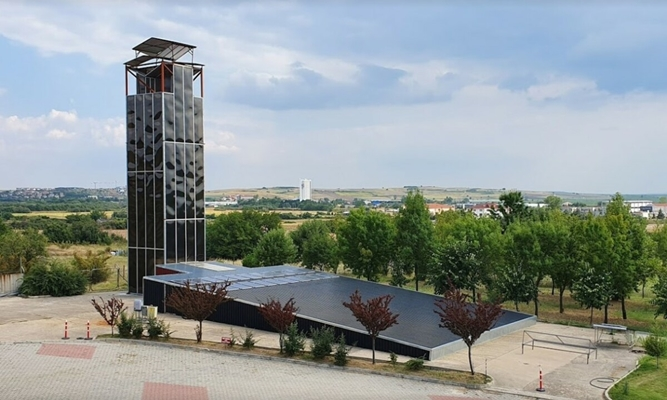


####  **AYDINLATMA1:** Genellenebilir yapılar oluşturma amacına uymayan bazı aykırı değerler(Pandemi) gerekçesiyle bazı 2021 yılı
#### verileri dahil edilmeyip 2020 yılına kadar olan analizler yapılmıştır.
#### **AYDINLATMA2:** Veriler aşağıda verilen kaynaklardan çekilerek herhangi bir yorum katılmadan direkt olarak işlenmiştir.
#### Raporu, veri kaynaklarında bulunan eksiklik veya yanlışık ihtimallerini göz önünde bulundurarak incelemenizi rica ediyoruz.
1. Ağırlıklı Veri Kaynakları(Data Sources):
    1. https://www.linkedin.com/school/trakya-university/people/
    1. https://muhendislik.trakya.edu.tr/
    1. https://www.trakya.edu.tr/
    1. https://www.google.com.tr/
    1. https://yokatlas.yok.gov.tr/lisans.php?y=109410193

##### Hazırlayan(prepared by):Berkay Cihan


